<img src="images/ss-services-tagline-transparent-web.png" alt="logo" width="200px" align="right"/>
# Irradiance & Insolation

#### Presented by Performance Analytics

## Irradiance

Solar irradiance is the power per unit area (often represented in W/m$^{2}$) received from the Sun in the form of electromagnetic radiation in the wavelength range of the measuring instrument.$^{1}$ Put simply, it is the amount of sunlight hitting 1 square meter at a 90 degree angle. Power over area.

We use irradiance as the measure of the total energy input to a PV system. With assumptions of losses within the system itself, paired with other environmental losses, we can begin to model the health of the system with _expected_ output from known inputs and identify any problem areas accordingly.

### POA & GHI

Measurement instruments on a PV system typically measure at 2 angles: __Plane of Array__ (POA) and __Global Horizontal Irradiance__ (GHI). These are two terms you will hear quite often in solar O&M.

__POA__ is the angle at which the PV system's panels are situated. A POA irradiance measurement device will share the same azimuth and tilt angle as the panels on the site. In fact, the device is often mounted on the module racking system itself to match the array. This provides measurements of how much irradiance the PV system is experiencing at any given point during the day.

<img src="images/poa_irradiance.jpg" alt="drawing" width="600px"/>

__GHI__ is the total amount of shortwave radiation received from above by a surface horizontal to the ground. GHI provides a common baseline across sites and can be used as an alternative for the preferred POA modules in operational and analytical capacities.


### Clear Sky

Irradiance typically tops out at ~1,000 W/m$^{2}$, close to the middle of the day when no obstructions (clouds) are present. __Clear sky models__ are used to estimate and represent the total irradiance for a specific location on a cloudless day, varying with factors such as altitude, water vapor, and other atmospheric conditions. Researchers have developed a cloudiness/clearness index in comparing clear sky models against measured irradiance (optimal versus actual). Performance Analytics often uses clear sky days for health modeling purposes, as we are then evaluating the PV system in its optimal state.

## Irradiance Measurement Devices

#### Pyranometers
A pyranometer is a type of actinometer used for measuring solar irradiance on a planar surface and it is designed to measure the solar radiation flux density (W/m2) from the hemisphere above within a wavelength range 0.3 μm to 3 μm.$^{2}$ Pyranometers respond to the change in temperature when the sunlight heats a black surface. It is specially designed to measure light from all angles from a wide light spectrum and intended to not be influenced by varying environmental conditions (ambient temperature, etc.).$^{3}$

<img src="images/pyranometer.jpeg" alt="pyra" width="300px"/>

#### Reference Cells
A reference cell is another irradiance measurement device that quantifies the amount of irradiance that is _available_ to a PV module. They reflect irradiance at angles and accept similar light bands to that of a PV module.$^{3}$ They differ from Pyranometers in that Pyranometers are a better tool for measuring its environment across various light bands, whereas Reference Cells may more accurately characterize the inputs of a PV system.

<img src="images/reference_cell.jpg" alt="ref_cell" width="300px"/>

#### Further reading

This is of course a simplification of irradiance and the devices that measure them. If you would like to learn more, please visit our [Irradiance in Depth]() Notebook.




## Irradiance in Practice

Now, let's take a look at measured irradiance from our own PV Systems.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.style.use('classic')

In [2]:
%matplotlib notebook

In [3]:
base_dir = "M:/Performance_Analytics/Training/"
data_dir = base_dir + "Data/"
irradiance_clear_file_path = data_dir + "White_Cross/WhiteCross_Irradiance_Clearsky_20180708.csv"
irradiance_cloudy_file_path = data_dir + "White_Cross/WhiteCross_Irradiance_Cloudy_20180712.csv"

In [4]:
irradiance_clear_df = pd.read_csv(irradiance_clear_file_path, index_col='Date', parse_dates=True, encoding='latin1')
irradiance_cloudy_df = pd.read_csv(irradiance_cloudy_file_path, index_col='Date', parse_dates=True, encoding='latin1')

In [5]:
irradiance_clear_df = irradiance_clear_df.loc['2018-07-08 07:00' : '2018-07-08 22:00']
irradiance_cloudy_df = irradiance_cloudy_df.loc['2018-07-12 07:00' : '2018-07-12 22:00']

In [6]:
refcell_clear_df = irradiance_clear_df.iloc[:,:3]
pyranometer_clear_df = irradiance_clear_df.iloc[:,-1]

<IPython.core.display.Javascript object>


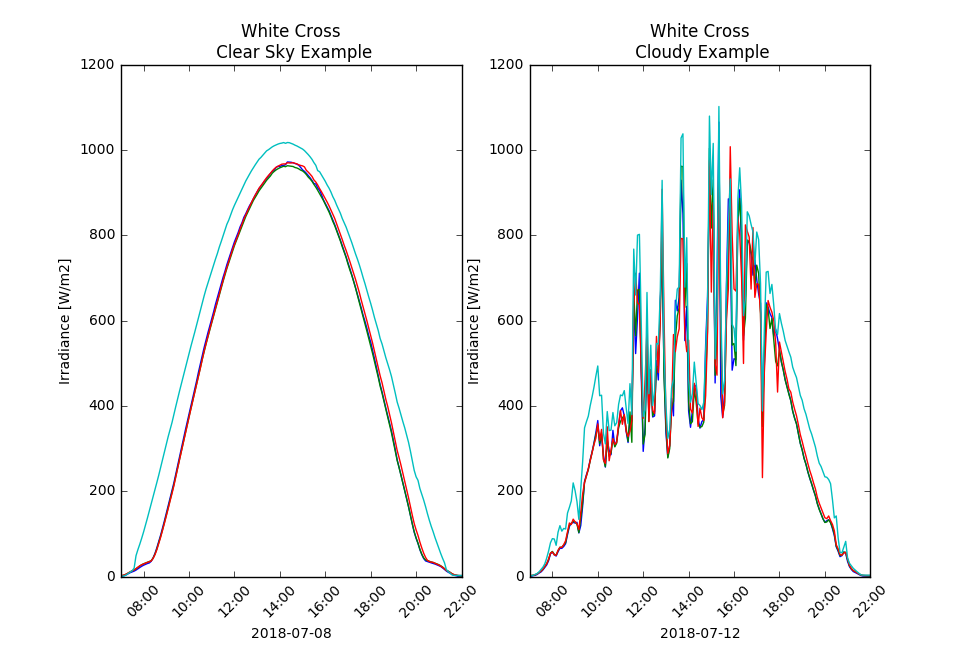

In [8]:
formatter = DateFormatter('%H:%M')

plt.subplot(1, 2, 1)
plt.plot(irradiance_clear_df)
plt.xlabel('2018-07-08')
plt.xticks(rotation=45)
plt.title('White Cross\n Clear Sky Example')
plt.ylabel('Irradiance [W/m2]')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter) 

plt.subplot(1, 2, 2)
plt.plot(irradiance_cloudy_df)
plt.xlabel('2018-07-12')
plt.xticks(rotation=45)
plt.title('White Cross\n Cloudy Example')
plt.ylabel('Irradiance [W/m2]')
plt.gcf().axes[1].xaxis.set_major_formatter(formatter) 

plt.show()

## Insolation

Insolation is simply solar irradiance integrated over time, generally represented kW__h__/m$^{2}$. So, Irradiance x Time. While irradiance shows the amount of sunlight/energy hitting an area at a particular instance, insolation reprents how much sunlight/energy hit an area across a period of time. Insolation is thus a useful metric for understanding the total energy made available to a PV system across a specified time period.

If you change the aggregate of our irradiance data to a _sum_ across the hour/day, then you have insolation. The same is found in the reverse - if you graph the _delta_ between insolation points, you would be representing irradiance.

Let's say the earth stopped rotating around the sun for 1 hour at 13:30 in July, thus making the sun "stagnant" in the sky for an hour. Irradiance measures 1,000 W/m$^{2}$ at that time, and thus would for that entire hour. Therefore, the insolation from 13:30 to 14:30 would be 1,000 Wh/m$^{2}$,  or 1 kWh/m$^{2}$.

## Sun Pathing

[This website](http://andrewmarsh.com/apps/staging/sunpath3d.html) provides a useful visual simulation of the paths the sun takes across the sky throughout the year, depending on the location.



![sun](images/sun.gif "sun")

## References

$^{1}$ [Solar irradiance - Wikipedia](https://en.wikipedia.org/wiki/Solar_irradiance)

$^{2}$ [Pyranometer - Wikipedia](https://en.wikipedia.org/wiki/Pyranometer)

$^{3}$ [Pyranometers and Reference Cells, What's the Difference? - NREL]()
